In [1]:
!pip install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.8/722.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.1/731.1 kB 16.5 MB/s eta 0:00:00


In [2]:
import torch
import pytorch_lightning as pl
from model import CustomResNet
from dataset import CIFAR10DataModule
import config
from callbacks import MyPrintingCallback, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger

In [3]:
torch.set_float32_matmul_precision("medium")

if __name__ == "__main__":
    logger = TensorBoardLogger("tb_logs", name="cifar10_model_v0")
    model = CustomResNet(
        input_size=config.INPUT_SIZE,
        learning_rate=config.LEARNING_RATE,
        num_classes=config.NUM_CLASSES,
    )
    dm = CIFAR10DataModule(
        data_dir=config.DATA_DIR,
        batch_size=config.BATCH_SIZE,
        num_workers=config.NUM_WORKERS,
        model=model,
    )
    trainer = pl.Trainer(
        logger=logger,
        accelerator=config.ACCELERATOR,
        devices=config.DEVICES,
        min_epochs=1,
        max_epochs=config.NUM_EPOCHS,
        precision=config.PRECISION,
        callbacks=[MyPrintingCallback(), EarlyStopping(monitor="val_loss")],
    )
    trainer.fit(model, dm)
    trainer.validate(model, dm)
    trainer.test(model, dm)

/usr/local/lib/python3.10/dist-packages/lightning_fabric/connector.py:554: UserWarning: 16 is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


100%|██████████| 170498071/170498071 [00:06<00:00, 28091625.98it/s]


Extracting dataset/cifar-10-python.tar.gz to dataset/
Files already downloaded and verified


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type               | Params
--------------------------------------------------
0 | loss_fn    | CrossEntropyLoss   | 0     
1 | accuracy   | MulticlassAccuracy | 0     
2 | accuracy1  | MulticlassAccuracy | 0     
3 | f1_score   | MulticlassF1Score  | 0     
4 | prep_layer | Sequential         | 1.9 K 
5 | layer_1    | CustomBlock        | 369 K 
6 | layer_2    | Sequential         | 295 K 
7 | layer_3    | CustomBlock        | 5.9 M 
8 | max_pool   | Sequential         | 0     
9 | fc         | Linear             | 5.1 K 
--------------------------------------------------
6.6 M     Trainable params
0         Non-trainable params
6.6 M     Total params
26.293    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Starting to train!


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Training is done.
Files already downloaded and verified
Files already downloaded and verified


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val_accuracy        │    0.9437999725341797     │
│         val_loss          │    0.1636410504579544     │
└───────────────────────────┴───────────────────────────┘

Files already downloaded and verified
Files already downloaded and verified


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.5267968773841858     │
└───────────────────────────┴───────────────────────────┘

In [28]:
!lsof -i:6006

In [29]:
!kill -9 3470

/bin/bash: line 1: kill: (3470) - No such process


In [30]:
!kill 3470

/bin/bash: line 1: kill: (3470) - No such process


In [ ]:
#xy = dm.get_misclassified_data(dm)

In [13]:
mean = [0.49139968, 0.48215841, 0.44653091]
std = [0.24703223, 0.24348513, 0.26158784]

In [14]:
def plot_misclassified(wrong_predictions, mean, std, num_img):
    fig = plt.figure(figsize=(15,12))
    fig.tight_layout()
    for i, (img, pred, correct) in enumerate(wrong_predictions[:num_img]):
        img, pred, target = img.cpu().numpy().astype(dtype=np.float32), pred.cpu(), correct.cpu()
        for j in range(img.shape[0]):
            img[j] = (img[j]*std[j])+mean[j]

        img = np.transpose(img, (1, 2, 0))
        ax = fig.add_subplot(5, 5, i+1)
        fig.subplots_adjust(hspace=.5)
        ax.axis('off')
        #class_names,_ = get_classes()
        classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

        ax.set_title(f'\nActual : {classes[target.item()]}\nPredicted : {classes[pred.item()]}',fontsize=10)
        ax.imshow(img)

    plt.show()

In [15]:
def wrong_predictions(model, test_loader, device):
    wrong_images=[]
    wrong_label=[]
    correct_label=[]
    model.eval()
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True).squeeze()  # get the index of the max log-probability

            wrong_pred = (pred.eq(target.view_as(pred)) == False)
            wrong_images.append(data[wrong_pred])
            wrong_label.append(pred[wrong_pred])
            correct_label.append(target.view_as(pred)[wrong_pred])
            wrong_predictions = list(zip(torch.cat(wrong_images),torch.cat(wrong_label),torch.cat(correct_label)))
        print(f'Total wrong predictions are {len(wrong_predictions)}')

    return wrong_predictions

In [17]:
test_loader = dm.val_dataloader()

wp = wrong_predictions(model, test_loader, "cpu")

Total wrong predictions are 265


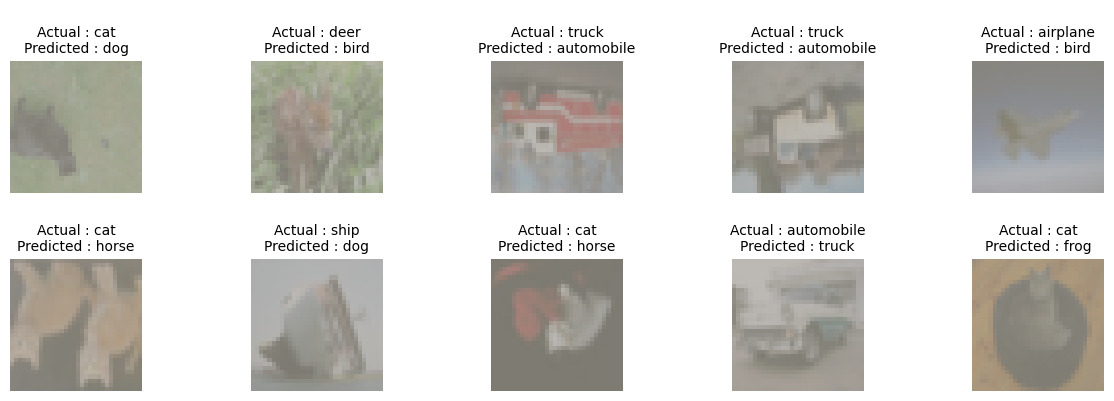

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plot_misclassified(wp, mean, std, 10)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Generating Grad-CAM @layer_3


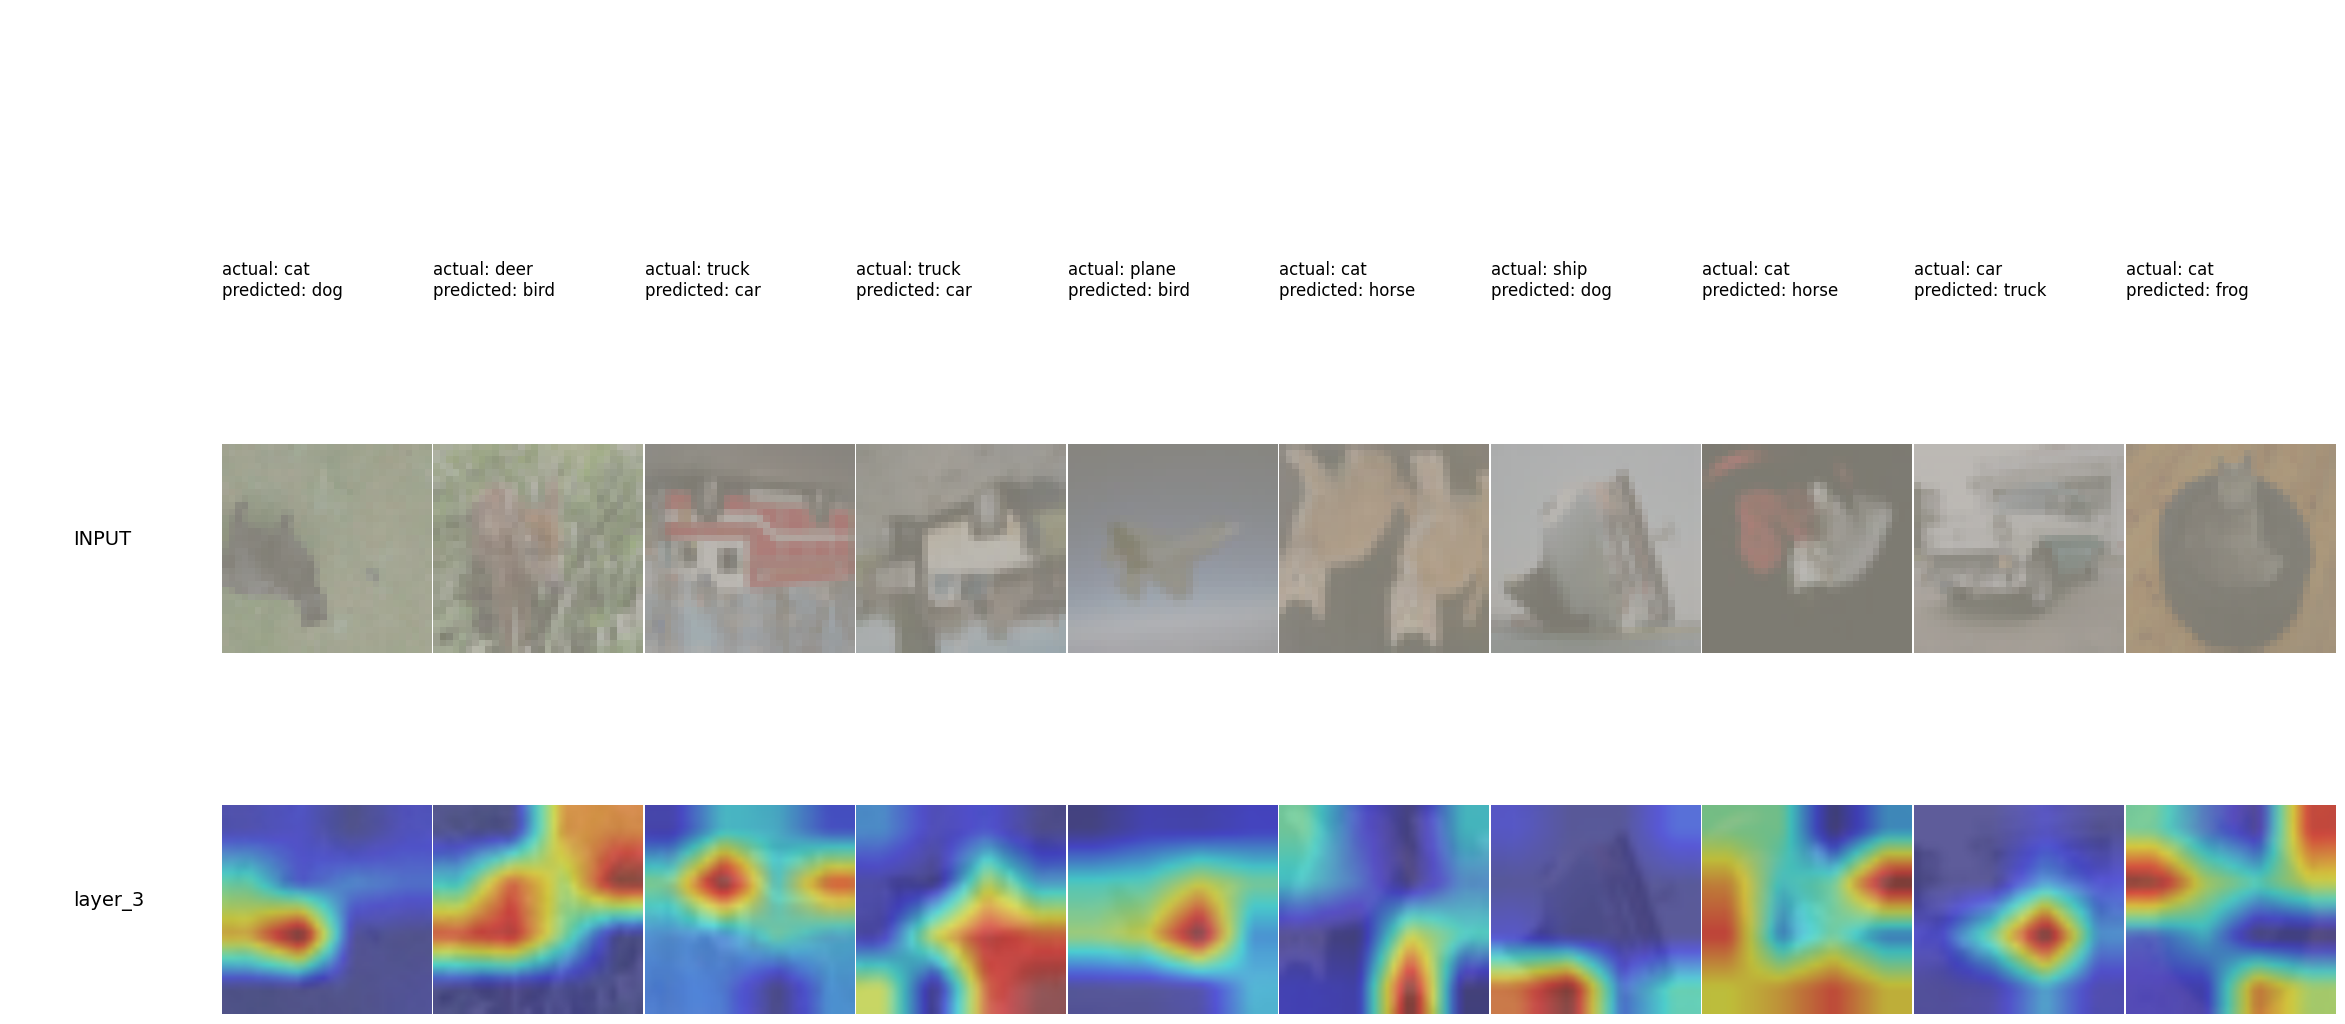

In [20]:
import gradcam
target_layers = ["layer_3"]
device = "cpu"
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
gradcam_output, probs, predicted_classes = gradcam.generate_gradcam(wp[:10], model, target_layers, device)
gradcam.plot_gradcam(gradcam_output, target_layers, classes, (3, 32, 32),predicted_classes, wp[:10], mean, std)

Generating Grad-CAM @layer_2


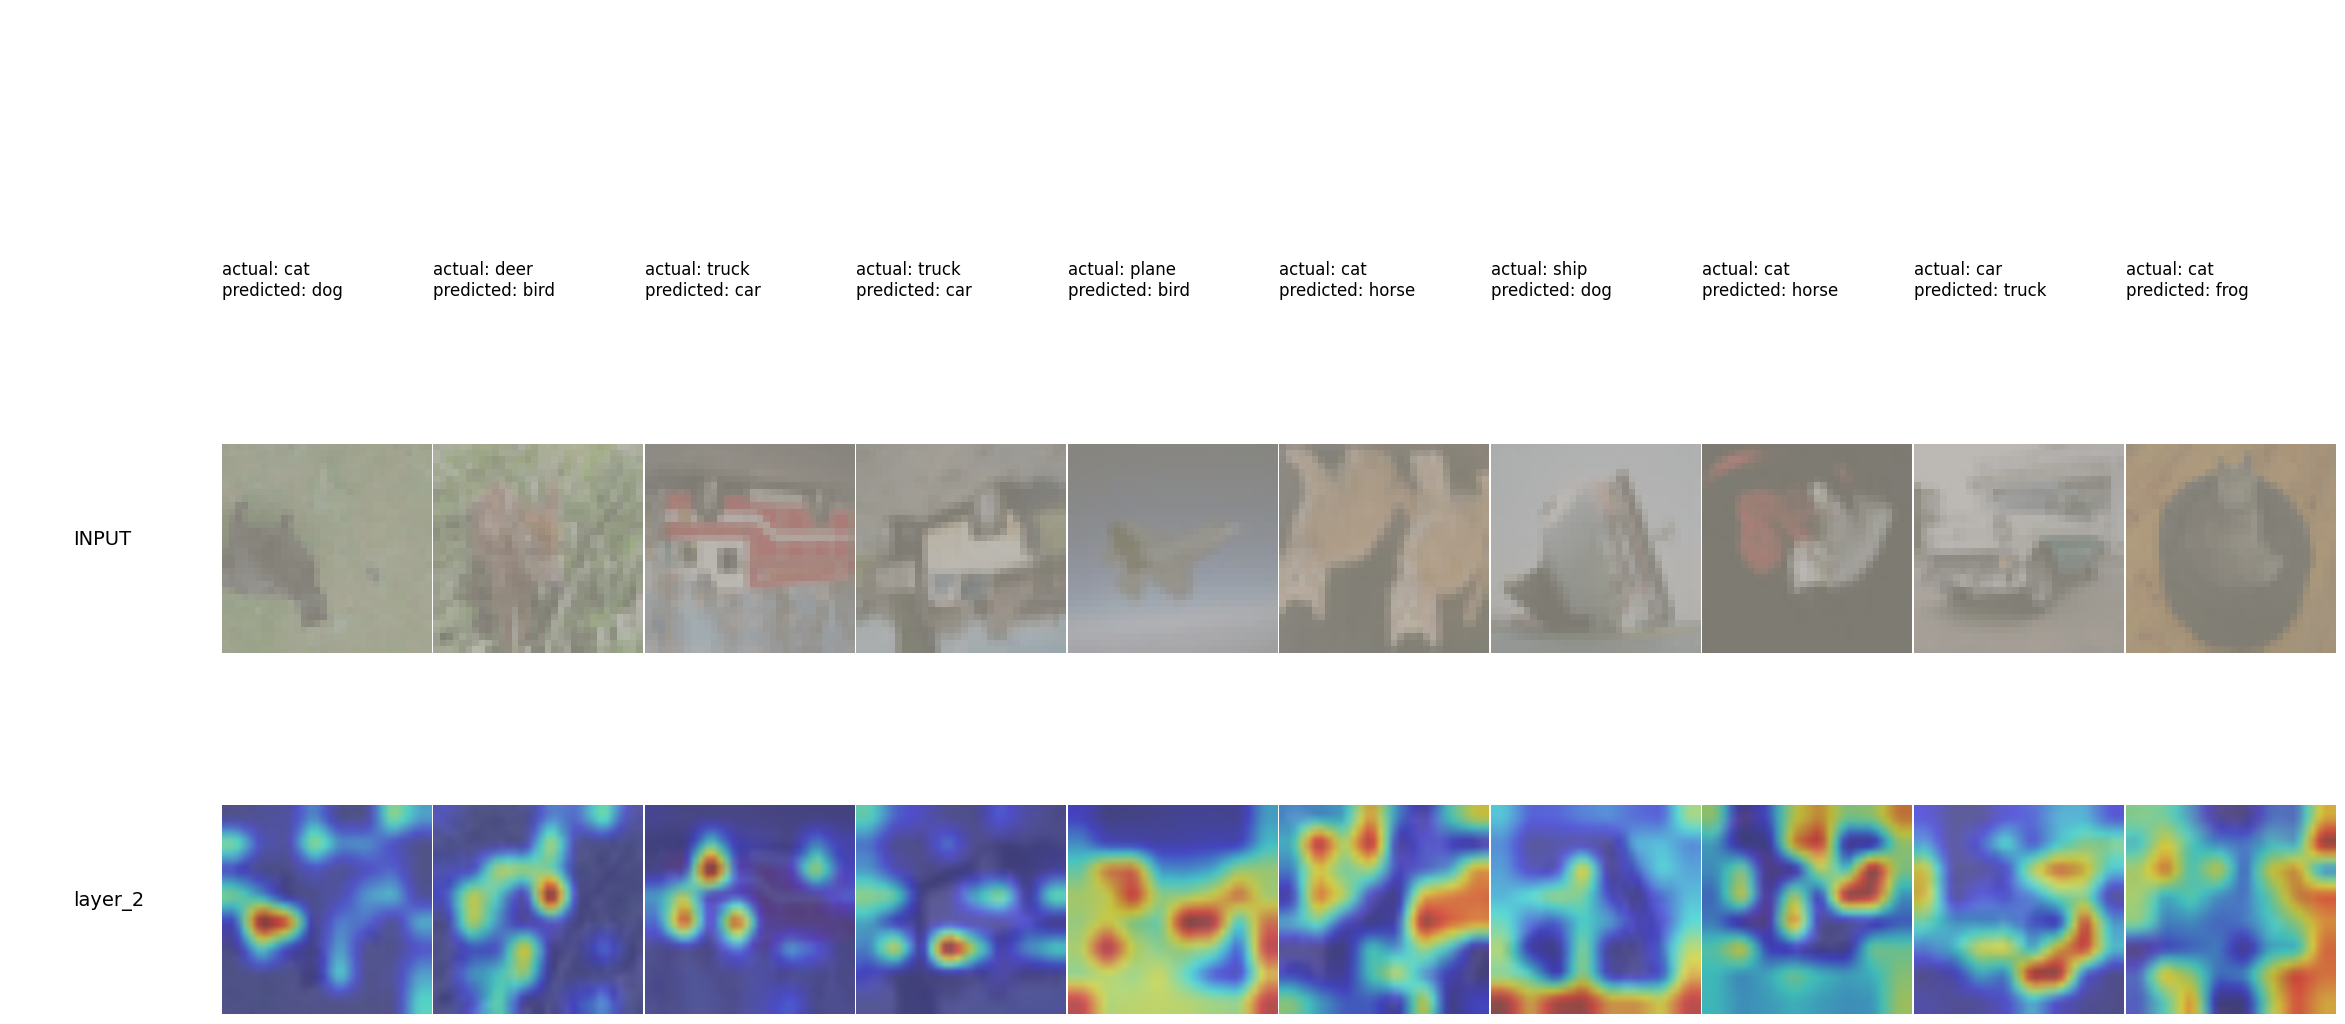

In [22]:
import gradcam
target_layers = ["layer_2"]
device = "cpu"
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
gradcam_output, probs, predicted_classes = gradcam.generate_gradcam(wp[:10], model, target_layers, device)
gradcam.plot_gradcam(gradcam_output, target_layers, classes, (3, 32, 32),predicted_classes, wp[:10], mean, std)

In [33]:
 #start tensorboard
 %load_ext tensorboard
 #reload_ext tensorboard
 %tensorboard --logdir tb_logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 3470), started 0:10:39 ago. (Use '!kill 3470' to kill it.)

<IPython.core.display.Javascript object>